In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
torch.manual_seed(5)

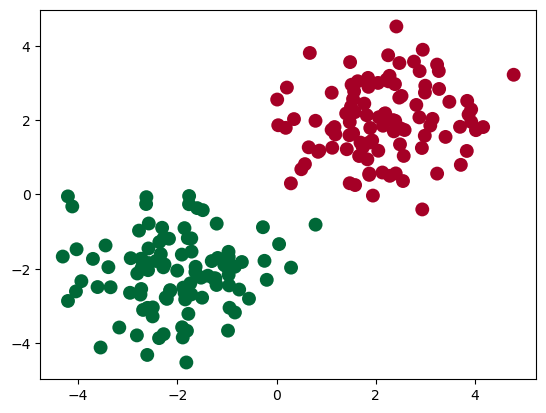

tensor([[ 3.8423,  2.5189,  0.0000],
        [ 0.2881,  0.2986,  0.0000],
        [ 4.0194,  1.7314,  0.0000],
        [ 1.8693,  0.5626,  0.0000],
        [ 2.3908,  1.9810,  0.0000],
        [ 0.6473,  1.2692,  0.0000],
        [ 2.9879,  1.5806,  0.0000],
        [ 1.4151,  1.2177,  0.0000],
        [ 4.7799,  3.2220,  0.0000],
        [ 1.6636,  1.0349,  0.0000],
        [ 1.8703,  1.3982,  0.0000],
        [ 2.1450,  1.8502,  0.0000],
        [ 1.5626,  2.7792,  0.0000],
        [ 1.9417, -0.0305,  0.0000],
        [ 3.4829,  2.4940,  0.0000],
        [ 2.2492,  3.7470,  0.0000],
        [ 1.7383,  1.2676,  0.0000],
        [ 3.6980,  1.8208,  0.0000],
        [ 3.9231,  2.2879,  0.0000],
        [ 2.9368, -0.4031,  0.0000],
        [ 1.8521,  2.8967,  0.0000],
        [ 2.5481,  0.3609,  0.0000],
        [ 0.1847,  1.7934,  0.0000],
        [ 1.4740,  0.3023,  0.0000],
        [ 2.8168,  2.4096,  0.0000],
        [ 2.2162,  3.0898,  0.0000],
        [ 2.1730,  2.1668,  0.0000],
 

In [4]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2 * n_data, 1)
y0 = torch.zeros(100, 1)
x1 = torch.normal(-2 * n_data, 1)
y1 = torch.ones(100, 1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)
# 0     1
# 1     1 2
# 2
x, y = Variable(x), Variable(y)

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy().squeeze(), s=100, lw=0, cmap='RdYlGn')
plt.show()

torch.cat((x, y), 1)

In [5]:
# Define Logistic Model
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid)

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
cost_fn = nn.BCELoss()
#cost_fn = -(y * torch.log(prob) + (1 - y)* torch.log(1 - prob) ).mean()

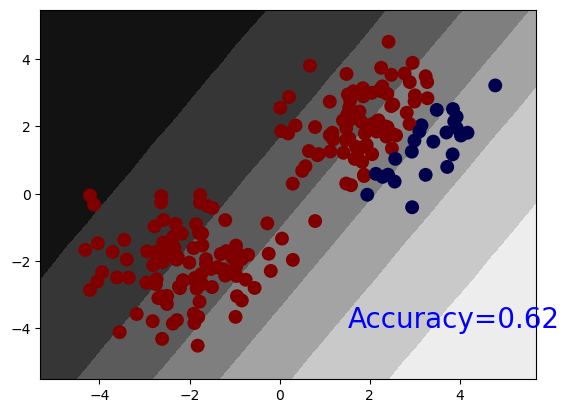

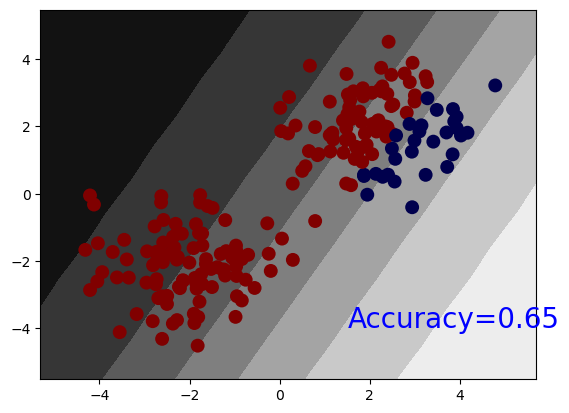

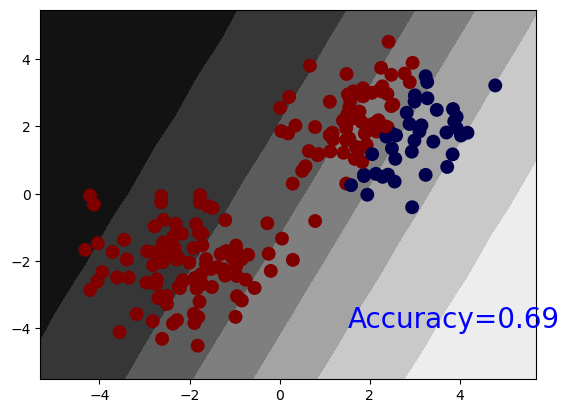

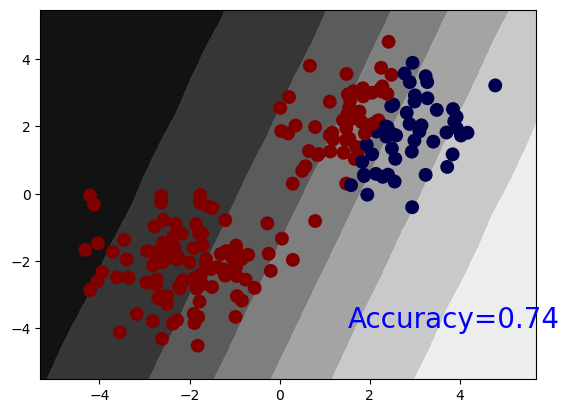

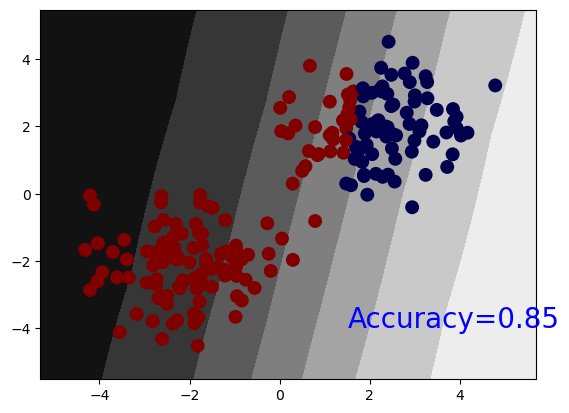

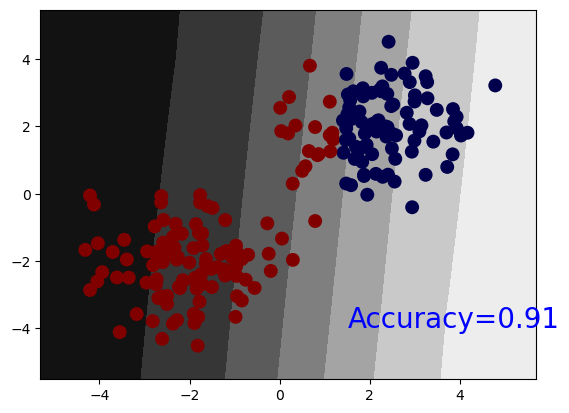

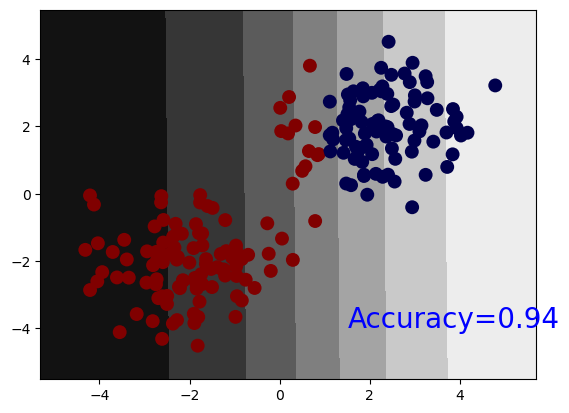

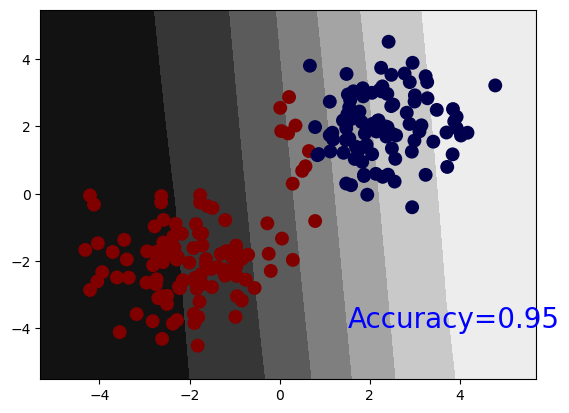

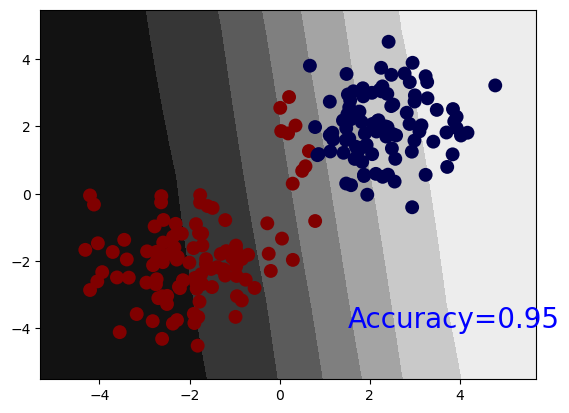

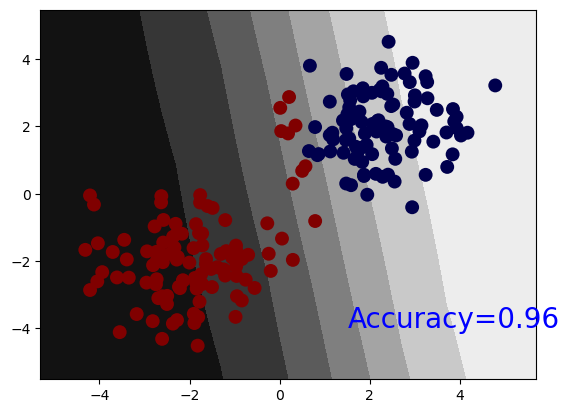

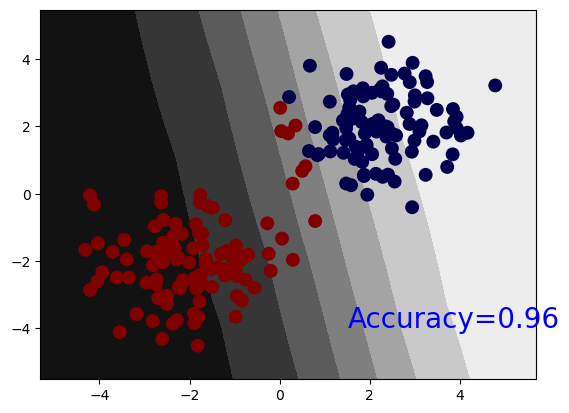

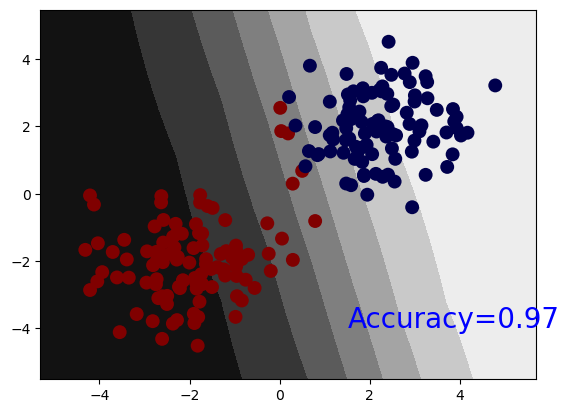

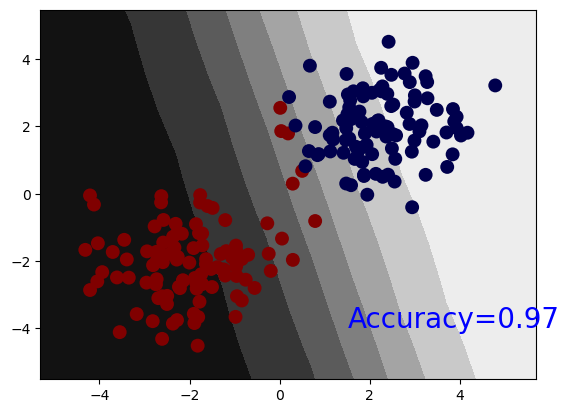

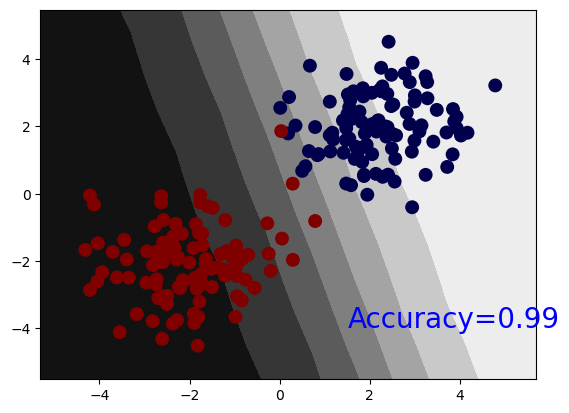

In [7]:
# Train
plt.ion()

for t in range(120):
    prob = model(x)
    cost = cost_fn(prob, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if t % 10 == 0 or t in [3, 6]:
        plt.cla()
        prediction = prob.gt(0.5)
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.squeeze(1).numpy()

        x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
        y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min.data.numpy(), x_max.data.numpy(), 1),
                             np.arange(y_min.data.numpy(), y_max.data.numpy(), 1))

        Z = model(Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).float())

        Z = Z.view(xx.shape)
        plt.contourf(xx, yy, Z.data.numpy(), cmap=plt.cm.binary)

        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='seismic')
        #RdYlGn
        accuracy = sum(pred_y == target_y) / 200.
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'Blue'})
        plt.show()
        plt.pause(0.1)

plt.ioff()

In [8]:
# Softmax Regression

torch.manual_seed(5)
nb_classes = 3

x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5],
          [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0],
          [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]

X = Variable(torch.Tensor(x_data))
Y = Variable(torch.Tensor(y_data))

_, Y_label = Y.max(dim=1)

In [10]:
# Define Model
linear = torch.nn.Linear(4, 3, bias=True)
model = torch.nn.Sequential(linear)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
cost_fn = nn.CrossEntropyLoss()
#loss(x, class) = weights[class] * (-x[class] + log(\sum_j exp(x[j])))

In [11]:
for step in range(100001):
    prediction = model(X)
    cost = cost_fn(prediction, Y_label)
    optimizer.zero_grad()

    cost.backward()
    optimizer.step()

    if step % 1000 == 0:
        print(step, cost.data.numpy())

0 1.7494378
1000 0.24095875
2000 0.1564468
3000 0.11515514
4000 0.09081393
5000 0.07483903
6000 0.063579135
7000 0.05522845
8000 0.04879507
9000 0.043690417
10000 0.03954377
11000 0.036109615
12000 0.033219986
13000 0.030755207
14000 0.028628567
15000 0.026775092
16000 0.02514575
17000 0.023702115
18000 0.022414424
19000 0.021258695
20000 0.02021584
21000 0.01926991
22000 0.018408347
23000 0.017620087
24000 0.016896347
25000 0.016229535
26000 0.015613162
27000 0.015041756
28000 0.014510401
29000 0.014015281
30000 0.013552804
31000 0.013119792
32000 0.01271343
33000 0.012331425
34000 0.011971649
35000 0.0116322
36000 0.011311481
37000 0.01100793
38000 0.010720149
39000 0.01044702
40000 0.010187369
41000 0.009940409
42000 0.009705088
43000 0.009480562
44000 0.009266243
45000 0.009061393
46000 0.008865364
47000 0.008677603
48000 0.008497613
49000 0.008324968
50000 0.008159122
51000 0.0079998365
52000 0.007846587
53000 0.0076990216
54000 0.0075569986
55000 0.007419977
56000 0.0072880047
57

In [12]:
# Testing & One-hot encoding
print('--------------')
a = model(Variable(torch.Tensor([[1, 11, 7, 9]])))
print(a.data.numpy(), torch.max(a, 1)[1].data.numpy())

print('--------------')
b = model(Variable(torch.Tensor([[1, 3, 4, 3]])))
print(b.data.numpy(), torch.max(b, 1)[1].data.numpy())

print('--------------')
c = model(Variable(torch.Tensor([[1, 1, 0, 1]])))
print(c.data.numpy(), torch.max(c, 1)[1].data.numpy())

print('--------------')
all = model(Variable(torch.Tensor([[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]])))
print(all.data.numpy(), torch.max(all, 1)[1].data.numpy())

--------------
[[-9.852811 18.40175  -6.877513]] [1]
--------------
[[ 9.457301  -2.5207782 -7.5452414]] [0]
--------------
[[-32.574512   4.641607  28.801434]] [2]
--------------
[[ -9.852815   18.40175    -6.877515 ]
 [  9.457301   -2.5207782  -7.5452414]
 [-32.574512    4.641607   28.801434 ]] [1 0 2]
